# Statistics from Stock Data

In this lab we will load stock data into a Pandas Dataframe and calculate some statistics on it. We will be working with stock data from Google, Apple, and Amazon. All the stock data was downloaded from yahoo finance in CSV format. In your workspace you should have a file named GOOG.csv containing the Google stock data, a file named AAPL.csv containing the Apple stock data, and a file  named AMZN.csv containing the Amazon stock data. (You can see the workspace folder by clicking on the Jupyter logo in the upper left corner of the workspace.) All the files contain 7 columns of data:

**Date Open High Low Close Adj_Close Volume**

We will start by reading in any of the above CSV files into a DataFrame and see what the data looks like.

In [43]:
# We import pandas into Python
import pandas as pd

# We read in a stock data data file into a data frame and see what it looks like
df = pd.read_csv('./AMZN.csv')

# We display the first 5 rows of the DataFrame
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,81.5000,89.5625,79.046799,89.3750,89.3750,16117600
1,2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400
2,2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400
3,2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000
4,2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400


We clearly see that the Dataframe is has automatically labeled the row indices using integers and has labeled the columns of the DataFrame using the names of the columns in the CSV files.

# To Do

You will now load the stock data from Google, Apple, and Amazon into separte DataFrames. However, for each stock data you will only be interested in loading the `Date` and `Adj Close` columns into the Dataframe. In addtion, you want to use the `Date` column as your row index. Finally, you want the DataFrame to recognize the dates as actual dates (year/month/day) and not as strings. For each stock, you can accomplish all theses things in just one line of code by using the appropiate keywords in the `pd.read_csv()` function. Here are a few hints:

* Use the `index_col` keyword to indicate which column you want to use as an index. For example `index_col = ['Open']`

* Set the `parse_dates` keyword equal to `True` to convert the Dates into real dates of the form year/month/day

* Use the `usecols` keyword to select which columns you want to load into the DataFrame. For example `usecols = ['Open', 'High']`

Fill in the code below:

In [9]:
import pandas as pd

# We load the Google stock data into a DataFrame
google_stock = pd.read_csv('./GOOG.csv', usecols=['Date', 'Adj Close'])

# We load the Apple stock data into a DataFrame
apple_stock = pd.read_csv('./AAPL.csv', usecols=['Date', 'Adj Close'])

# We load the Amazon stock data into a DataFrame
amazon_stock = pd.read_csv('./AMZN.csv', usecols=['Date', 'Adj Close'])

You can check that you have loaded the data correctly by displaying the head of the DataFrames.

In [10]:
# We display the google_stock DataFrame
google_stock.head()

,Date,Adj Close
0,2004-08-19,49.845802
1,2004-08-20,53.805050
2,2004-08-23,54.346527
3,2004-08-24,52.096165
4,2004-08-25,52.657513


You will now join the three DataFrames above to create a single new DataFrame that contains all the `Adj Close` for all the stocks. Let's start by creating an empty DataFrame that has as row indices calendar days between `2000-01-01`  and `2016-12-31`. We will use the `pd.date_range()` function to create the calendar dates first and then we will create a DataFrame that uses those dates as row indices:

In [11]:
# We create calendar dates between '2000-01-01' and  '2016-12-31'
dates = pd.date_range('2000-01-01', '2016-12-31')

# We create and empty DataFrame that uses the above dates as indices
all_stocks = pd.DataFrame(index = dates)

# To Do

You will now join the the individual DataFrames, `google_stock`, `apple_stock`, and `amazon_stock`, to the `all_stocks` DataFrame. However, before you do this, it is necessary that you change the name of the columns in each of the three dataframes. This is because the column labels in the `all_stocks` dataframe must be unique. Since all the columns in the individual dataframes have the same name, `Adj Close`, we must change them to the stock name before joining them. In the space below change the column label `Adj Close` of each individual dataframe to the name of the corresponding stock. You can do this by using the `pd.DataFrame.rename()` function. 

In [12]:
# Change the Adj Close column label to Google
google_stock = google_stock.rename(columns={'Adj Close' : 'GOOG'})

# Change the Adj Close column label to Apple
apple_stock = apple_stock.rename(columns={'Adj Close' : 'AAPL'})

# Change the Adj Close column label to Amazon
amazon_stock = amazon_stock.rename(columns={'Adj Close' : 'AMZN'})

You can check that the column labels have been changed correctly by displaying the datadrames

In [13]:
# We display the google_stock DataFrame
amazon_stock.head()

,Date,AMZN
0,2000-01-03,89.3750
1,2000-01-04,81.9375
2,2000-01-05,69.7500
3,2000-01-06,65.5625
4,2000-01-07,69.5625


Now that we have unique column labels, we can join the individual DataFrames to the `all_stocks` DataFrame. For this we will use the `dataframe.join()` function. The function `dataframe1.join(dataframe2)` joins `dataframe1` with `dataframe2`. We will join each dataframe one by one to the `all_stocks` dataframe. Fill in the code below to join the dataframes, the first join has been made for you:

In [24]:
# Assuming you have DataFrames named google_stock, apple_stock, and amazon_stock
# Also, assuming that the index of these DataFrames is the date

# Join Google stock to all_stocks
all_stocks = all_stocks.join(google_stock.set_index('Date'), how='outer', rsuffix='_google')

# Join Apple stock to all_stocks
all_stocks = all_stocks.join(apple_stock.set_index('Date'), how='outer', rsuffix='_apple')

# Join Amazon stock to all_stocks
all_stocks = all_stocks.join(amazon_stock.set_index('Date'), how='outer', rsuffix='_amazon')

# Now, all_stocks should contain the stock data for all three companies


You can check that the dataframes have been joined correctly by displaying the `all_stocks`  dataframe

In [25]:
# We display the google_stock DataFrame
all_stocks.head()

,GOOG,AAPL,AMZN
2000-01-01 00:00:00,NaN,NaN,NaN
2000-01-02 00:00:00,NaN,NaN,NaN
2000-01-03 00:00:00,NaN,NaN,NaN
2000-01-04 00:00:00,NaN,NaN,NaN
2000-01-05 00:00:00,NaN,NaN,NaN


# To Do

Before we proceed to get some statistics on the stock data, let's first check that we don't have any *NaN* values. In the space below check if there are any *NaN* values in the `all_stocks`  dataframe. If there are any, remove any rows that have *NaN* values:

In [28]:
# Check if there are any NaN values in the all_stocks dataframe
all_stocks.isnull().any()

# Remove any rows that contain NaN values
all_stocks.dropna()

,GOOG,AAPL,AMZN
2004-08-19,49.845802,1.973460,38.630001
2004-08-20,53.805050,1.979244,39.509998
2004-08-23,54.346527,1.997236,39.450001
2004-08-24,52.096165,2.053144,39.049999
2004-08-25,52.657513,2.123831,40.299999
...,...,...,...
2017-10-09,977.000000,155.839996,990.989990
2017-10-10,972.599976,155.899994,987.200012
2017-10-11,989.250000,156.550003,995.000000
2017-10-12,987.830017,156.000000,1000.929993


Now that you have eliminated any *NaN* values we can now calculate some basic statistics on the stock prices. Fill in the code below

In [33]:
# Print the average stock price for each stock
avg_goog = all_stocks['GOOG'].mean()
avg_aapl = all_stocks['AAPL'].mean()
avg_amzn = all_stocks['AMZN'].mean()
print('Average of each stocks is: AAPL',avg_aapl,'AMZN', avg_amzn,'GOOG', avg_goog)

# Print the median stock price for each stock
med_goog = all_stocks['GOOG'].median()
med_aapl = all_stocks['AAPL'].median()
med_amzn = all_stocks['AMZN'].median()
print('Median of each stocks is: AAPL',med_aapl,'AMZN', med_amzn, 'GOOG',med_goog)

# Print the standard deviation of the stock price for each stock  
std_goog = all_stocks['GOOG'].std()
std_aapl = all_stocks['AAPL'].std()
std_amzn = all_stocks['AMZN'].std()
print('Standard derivation of each stocks is: AAPL',std_aapl,'AMZN', std_amzn, 'GOOG',std_goog)

# Print the correlation between stocks
corr_goog_aapl = all_stocks['GOOG'].corr(all_stocks['AAPL'])
corr_goog_amzn = all_stocks['GOOG'].corr(all_stocks['AMZN'])
corr_aapl_amzn = all_stocks['AAPL'].corr(all_stocks['AMZN'])
print('Correlation of each stocks is: AAPL',corr_goog_aapl,'AMZN', corr_goog_amzn, 'GOOG',corr_aapl_amzn)

Average of each stocks is: AAPL 40.06995888067039 AMZN 199.754344295419 GOOG 380.07245805795344
Median of each stocks is: AAPL 20.428621 AMZN 80.239998 GOOG 293.029114
Standard derivation of each stocks is: AAPL 43.47884292618758 AMZN 242.72865577540898 GOOG 223.85377970631518
Correlation of each stocks is: AAPL 0.9293591956563904 AMZN 0.9658531346712951 GOOG 0.9263602526852812


We will now look at how we can compute some rolling statistics, also known as moving statistics. We can calculate for example the rolling mean (moving average) of the Google stock price by using the Pandas `dataframe.rolling().mean()` method. The `dataframe.rolling(N).mean()` calculates the rolling mean over an `N`-day window. In other words, we can take a look at the average stock price every `N`  days using the above method. Fill in the code below to calculate the average stock price every 150 days for Google stock

In [36]:
# We compute the rolling mean using a 150-Day window for Google stock
rollingMean = all_stocks.rolling(150).mean()
print(rollingMean)

                           GOOG        AAPL        AMZN
2000-01-01 00:00:00         NaN         NaN         NaN
2000-01-02 00:00:00         NaN         NaN         NaN
2000-01-03 00:00:00         NaN         NaN         NaN
2000-01-04 00:00:00         NaN         NaN         NaN
2000-01-05 00:00:00         NaN         NaN         NaN
...                         ...         ...         ...
2017-10-09           914.616868  149.788337  955.004533
2017-10-10           915.531735  149.908423  955.915866
2017-10-11           916.535535  150.034959  956.862533
2017-10-12           917.499402  150.154785  957.852333
2017-10-13           918.460335  150.280815  958.841333

[10685 rows x 3 columns]


We can also visualize the rolling mean by plotting the data in our dataframe. In the following lessons you will learn how to use **Matplotlib** to visualize data. For now I will just import matplotlib and plot the Google stock data on top of the rolling mean. You can play around by changing the rolling mean window and see how the plot changes. 

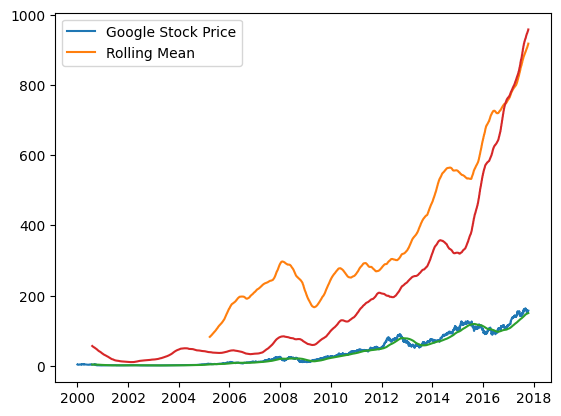

In [40]:
# this allows plots to be rendered in the notebook
%matplotlib inline 

# We import matplotlib into Python
import matplotlib.pyplot as plt


# We plot the Google stock data
plt.plot(all_stocks['AAPL'])

# We plot the rolling mean ontop of our Google stock data
plt.plot(rollingMean)
plt.legend(['Google Stock Price', 'Rolling Mean'])
plt.show()